In [2]:
import pandas as pd

tax = {}

tax["InformationSeeking"] = ["Question","ClarificationElicitation"]
tax["InformationProviding"]= ["Answer","Agreement","Disagreement","NeutralResponse","UnderstandingNegative", "ContextSetting", "ExtensionOfPrevious","ProposeAction","StateDecision"]
tax["Social"] = ["Thanking", "Apologising"]

higher_labs = list(tax.keys())
lower_labs = []
for k in tax:
    lower_labs += tax[k]

lower2higher = {}
for k in tax:
    for v in tax[k]:
        lower2higher[v] = k

for k in tax:
    lower2higher[k] = k # higher labs map to themselves in the lower to higher mapping

lower2higher["FollowOnComment"] = "InformationProviding"



In [3]:
# Counts of different labels
df = pd.read_csv(open("sodestream-dialogue-annotations.csv","r"))

all_possible_labels = set()

data, label_counts = [], []
for label_list in df["labels"]: 
    label_set = set(label_list.split(","))
    upper_labs = set()
    for l in label_set:
        if lower2higher[l] not in label_set:
            upper_labs.add(lower2higher[l])
    label_set = set(list(upper_labs) + list(label_set))
    for label in label_set:
        data.append(label)
        all_possible_labels.add(label)
    label_counts.append(len(label_set))

    
all_possible_labels = sorted(list(all_possible_labels))

In [5]:
df.head(50)

,Unnamed: 0,draft_id,thread_id,segment_id,labels,relation,antecedent_segment_id,content,message_id,address,is_author,is_wg_chair,percentile,date
0,0,EdDSA,1,0,"InformationProviding,InformationProviding",NaN,-1,In section 3.3 is the formula,<001501d16213$24b7eff0$6e27cfd0$@augustcellars...,ietf@augustcellars.com,0.0,NaN,NaN,2016-02-07 17:50:52
1,1,EdDSA,1,9,"ExtensionOfPrevious,ExtensionOfPrevious",0,-1,\nS = (r + H(ENC(R) || ENC(A) || P(M)) s) mod l.,<001501d16213$24b7eff0$6e27cfd0$@augustcellars...,ietf@augustcellars.com,0.0,NaN,NaN,2016-02-07 17:50:52
2,2,EdDSA,1,10,"ExtensionOfPrevious,InformationProviding",NaN,-1,\nSupposed to be,<001501d16213$24b7eff0$6e27cfd0$@augustcellars...,ietf@augustcellars.com,0.0,NaN,NaN,2016-02-07 17:50:52
3,3,EdDSA,1,11,"ExtensionOfPrevious,ExtensionOfPrevious",10,-1,\nS = (r + H(ENC(R) || ENC(A) || PH(M)) s) mod l.,<001501d16213$24b7eff0$6e27cfd0$@augustcellars...,ietf@augustcellars.com,0.0,NaN,NaN,2016-02-07 17:50:52
4,4,EdDSA,1,28,"NeutralResponse,InformationProviding,NeutralRe...",11,11,"\nYes, fixed in working copy.\n",<20160208064027.GA12661@LK-Perkele-V2.elisa-la...,ilariliusvaara@welho.com,1.0,0.0,2.0,2016-02-08 08:40:27
5,5,EdDSA,1,29,Social,11,11,\n-Ilari,<20160208064027.GA12661@LK-Perkele-V2.elisa-la...,ilariliusvaara@welho.com,1.0,0.0,2.0,2016-02-08 08:40:27
6,6,EdDSA,2,0,Social,NaN,-1,"Hi,",<CADZyTknh2VZXCz8kmYnDWxFoJ2wCxcgeyk61vatbVYYE...,daniel.migault@ericsson.com,0.0,1.0,3.0,2016-11-02 23:55:10
7,7,EdDSA,2,16,"InformationProviding,InformationProviding",NaN,-1,\nThis message starts a Working Group Last Cal...,<CADZyTknh2VZXCz8kmYnDWxFoJ2wCxcgeyk61vatbVYYE...,daniel.migault@ericsson.com,0.0,1.0,3.0,2016-11-02 23:55:10
8,8,EdDSA,2,17,"ExtensionOfPrevious,InformationProviding",NaN,-1,\nThe version to be reviewed is\nhttps://tools...,<CADZyTknh2VZXCz8kmYnDWxFoJ2wCxcgeyk61vatbVYYE...,daniel.migault@ericsson.com,0.0,1.0,3.0,2016-11-02 23:55:10
9,9,EdDSA,2,18,"ExtensionOfPrevious,InformationProviding,Propo...",NaN,-1,"\nPlease send your comments, questions, and ed...",<CADZyTknh2VZXCz8kmYnDWxFoJ2wCxcgeyk61vatbVYYE...,daniel.migault@ericsson.com,0.0,1.0,3.0,2016-11-02 23:55:10


In [3]:
for l in all_possible_labels:
    print(l, data.count(l))

Agreement 651
Answer 655
Apologising 58
ClarificationElicitation 326
ContextSetting 2212
Disagreement 365
ExtensionOfPrevious 3007
FollowOnComment 1
InformationProviding 7643
InformationSeeking 1146
NeutralResponse 2066
ProposeAction 2225
Question 865
Social 1040
StateDecision 359
Thanking 249
UnderstandingNegative 146


In [4]:
import numpy as np
print("Average labels per example: " + str(np.mean(label_counts)))

Average labels per example: 2.7963547995139733


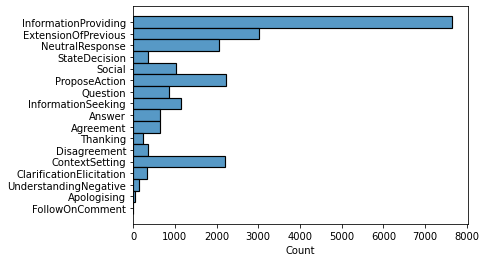

In [5]:
import seaborn as sns
sns.histplot(y=data)
sns.set(rc={'figure.figsize':(21.7,16.27)})

### Add info about whether questions get answered

In [6]:
# Do questions get answered?
df = pd.read_csv(open("sodestream-dialogue-annotations.csv","r"))



In [7]:
total_questions, total_answered_questions = 0, 0
key2answered = set()
for did in set(df.draft_id):    
    print(did)
    for tid in set(df.thread_id):        
        # find all questions in thread        
        question_ids, answer_ids = set(), set()
        for sid in df[(df.draft_id == did) & (df.thread_id == tid)].segment_id: 
            #print("-----")
            #print(df[(df.draft_id == did) & (df.thread_id == tid) & (df.segment_id == sid)]["labels"].iloc(0))
            label_string = list(df[(df.draft_id == did) & (df.thread_id == tid) & (df.segment_id == sid)]["labels"].iloc(0))[0]
            antecedent_id = list(df[(df.draft_id == did) & (df.thread_id == tid) & (df.segment_id == sid)]["antecedent_segment_id"].iloc(0))[0]
            if "Question" in label_string:
                question_ids.add(sid)
            if "Answer" in label_string:
                answer_ids.add(antecedent_id)
        total_questions += len(question_ids)
        total_answered_questions += len(question_ids.intersection(answer_ids))
        for a in answer_ids:
            key2answered.add((did,tid,a))

print(total_questions)
print(total_answered_questions)
print(total_answered_questions / total_questions)
        
            
        

RtcWEB
TLS 15+
EdDSA
MMusic
865
318
0.3676300578034682


In [8]:
answered_list = []
for i in range(df.shape[0]):
    rowi = df.iloc[i]    
    did = rowi[1]
    tid = rowi[2]
    sid = rowi[3]
    if((did,tid,sid)) in key2answered:
        answered_list.append(int(1))
    else:
        answered_list.append(0)
#print(answered_list)
df["is_answered"] = answered_list


In [9]:
print(df.columns)

Index(['Unnamed: 0', 'draft_id', 'thread_id', 'segment_id', 'labels',
       'relation', 'antecedent_segment_id', 'content', 'message_id', 'address',
       'is_author', 'is_wg_chair', 'percentile', 'date', 'is_answered'],
      dtype='object')


In [10]:
all_possible_labels = [
 'InformationProviding',
 'Agreement',
 'Answer',
 'ContextSetting',
 'Disagreement',
 'ExtensionOfPrevious',
 'NeutralResponse',    
 'ProposeAction', 
 'StateDecision', 
 'InformationSeeking',
 'ClarificationElicitation',
 'Question',
 'Social',
 'Thanking',
]


### Code for drawing the heatmaps

['InformationProviding', 'Agreement', 'Answer', 'ContextSetting', 'Disagreement', 'ExtensionOfPrevious', 'NeutralResponse', 'ProposeAction', 'StateDecision', 'InformationSeeking', 'ClarificationElicitation', 'Question', 'Social', 'Thanking']
returning this
                          everything
InformationProviding        0.276874
Agreement                   0.033515
Answer                      0.033721
ContextSetting              0.113880
Disagreement                0.018791
ExtensionOfPrevious         0.154808
NeutralResponse             0.106363
ProposeAction               0.114549
StateDecision               0.018482
InformationSeeking          0.014673
ClarificationElicitation    0.016783
Question                    0.044533
Social                      0.040208
Thanking                    0.012819


<AxesSubplot:>

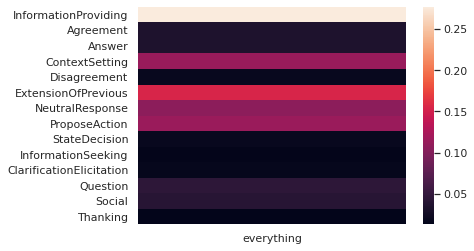

In [11]:
%matplotlib inline
import math

def generate_DA_distribution(df_list):
    all_possible_labels = [
 'InformationProviding',
 'Agreement',
 'Answer',
 'ContextSetting',
 'Disagreement',
 'ExtensionOfPrevious',
 'NeutralResponse',    
 'ProposeAction', 
 'StateDecision', 
 'InformationSeeking',
 'ClarificationElicitation',
 'Question',
 'Social',
 'Thanking',
]

    rownames = all_possible_labels
    colnames = []
    coldata = []
    for name, data_df in df_list:
        label_counts = {}
        for label_list in data_df["labels"]:             
            for label in all_possible_labels:
                if label not in label_counts:
                    label_counts[label] = 0
                if label in label_list:
                    label_counts[label] += 1
        colnames.append(name)
        counts_list = [label_counts[x] for x in all_possible_labels]
        norm_const = sum(counts_list)
        counts_list = [x/norm_const for x in counts_list]
        coldata.append(counts_list)
    #print(rownames)
    #print(colnames)
    #print(coldata)
    image_data_df = pd.DataFrame(data=np.array(coldata).T, index = rownames, columns = colnames)
    print(rownames)
    print("returning this")
    print(image_data_df)
    return(image_data_df)
    
data_for_plot = generate_DA_distribution([("everything",df)])
sns.heatmap(data_for_plot)
            
                
            

        

#sns.heatmap(df[], annot=True)

### DA distributions across time

['InformationProviding', 'Agreement', 'Answer', 'ContextSetting', 'Disagreement', 'ExtensionOfPrevious', 'NeutralResponse', 'ProposeAction', 'StateDecision', 'InformationSeeking', 'ClarificationElicitation', 'Question', 'Social', 'Thanking']
returning this
                                T1        T2        T3        T4        T5
InformationProviding      0.286602  0.247052  0.272358  0.272287  0.301469
Agreement                 0.033806  0.033650  0.038872  0.036679  0.024147
Answer                    0.040766  0.041990  0.028455  0.032348  0.025890
ContextSetting            0.109620  0.082255  0.114583  0.127101  0.132437
Disagreement              0.017649  0.033937  0.016768  0.014264  0.013194
ExtensionOfPrevious       0.136465  0.134024  0.147612  0.148752  0.204381
NeutralResponse           0.101168  0.149842  0.101372  0.110545  0.074434
ProposeAction             0.117574  0.119643  0.120935  0.106979  0.108788
StateDecision             0.018643  0.013805  0.020071  0.022669  0.

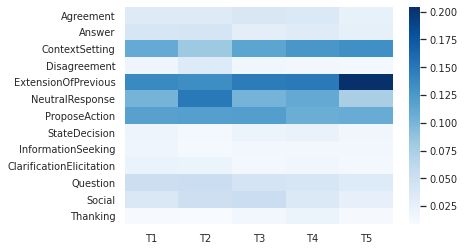

In [18]:
import matplotlib.pylab as p
draft_names = ["MMusic","RtcWEB","TLS 15+","EdDSA"]
name_index = 1

data_for_function = []
for cutoff in [(0,0.2),(0.2,0.4),(0.4, 0.6),(0.6,0.8),(0.8,1.0)]:
    df_list = []
    for draft_name in draft_names:        
        tmpdf = df[(df.date.notnull()) & (df.draft_id == draft_name)]
        sorted_tmpdf = tmpdf.sort_values(by = ['date']) 
        nrows = sorted_tmpdf.shape[0]
        df_list.append(sorted_tmpdf[int(cutoff[0] * nrows): int(cutoff[1] * nrows) - 1])
    df_for_cutoff = pd.concat(df_list, axis = 0)
    data_for_function.append(("T" + str(name_index), df_for_cutoff))
    name_index += 1
    
    
data_for_plot = generate_DA_distribution(data_for_function)
data_for_plot = data_for_plot.drop(["InformationProviding"])

#data_for_plot = data_for_plot.rename(index={"ExtensionOfPrevious":"Extension"})
sns.set(font_scale=0.9)

plt = sns.heatmap(data_for_plot, cmap="Blues")

#plt.set_xticklabels(plt.get_xticklabels(), rotation = 0, fontsize = 8)
#plt.set_yticklabels(plt.get_yticklabels(), rotation = 0, fontsize = 8)
#plt.legend (plt.legend.get_yticklabels(), fontsize = 8)

plt.get_figure().savefig("ACL2023-leda-timesplit.pdf", bbox_inches="tight")
    


### DA distributions across different subpopulations


['InformationProviding', 'Agreement', 'Answer', 'ContextSetting', 'Disagreement', 'ExtensionOfPrevious', 'NeutralResponse', 'ProposeAction', 'StateDecision', 'InformationSeeking', 'ClarificationElicitation', 'Question', 'Social', 'Thanking']
returning this
                           Authors  ~Authors    Chairs   ~Chairs  Influential  \
InformationProviding      0.300097  0.274125  0.258687  0.264755     0.266010   
Agreement                 0.038911  0.032877  0.033345  0.037132     0.038144   
Answer                    0.059825  0.030631  0.030888  0.037534     0.038677   
ContextSetting            0.096790  0.115903  0.133380  0.107970     0.109839   
Disagreement              0.020914  0.018540  0.015795  0.021352     0.021702   
ExtensionOfPrevious       0.115759  0.159431  0.159003  0.130598     0.131807   
NeutralResponse           0.086089  0.108763  0.093015  0.120124     0.120091   
ProposeAction             0.110409  0.115039  0.119691  0.121466     0.122753   
StateDecision 

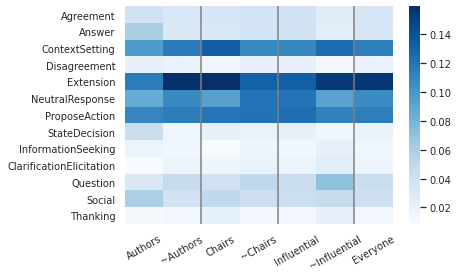

In [19]:
# authors
authors_df = df[df.is_author == 1]
not_authors_df = df[(df.is_author.notnull()) & (df.is_author == 0)]

# wg_chairs
wg_chairs_df = df[df.is_wg_chair == 1]
not_wg_chairs_df = df[(df.is_wg_chair.notnull()) & (df.is_wg_chair == 0)]
# influential participants (0-10 (20?) percentile)
influencers_df = df[df.percentile <= 10]
not_influencers_df = df[(df.percentile.notnull()) & (df.percentile > 10)]
# others
everyone_df = df

data_for_function = [
    ("Authors", authors_df),    
    ("~Authors", not_authors_df),
    ("Chairs", wg_chairs_df),
    ("~Chairs", not_wg_chairs_df),
    ("Influential", influencers_df),
    ("~Influential", not_influencers_df),
    ("Everyone", everyone_df)
]
sns.set(font_scale=0.9)
data_for_plot = generate_DA_distribution(data_for_function)
data_for_plot = data_for_plot.drop(["InformationProviding"])
data_for_plot = data_for_plot.rename(index={"ExtensionOfPrevious":"Extension"})

plt = sns.heatmap(data_for_plot, cmap="Blues")
plt.set_xticklabels(plt.get_xticklabels(), rotation = 30)
plt.vlines([2, 4, 6, 8], colors = ["gray"], *plt.get_ylim())

plt.get_figure().savefig("ACL2023-leda-roles.pdf", bbox_inches="tight")

### Generate number of unanswered questions per group

In [14]:
tasks = [
    ("Authors", authors_df),
    ("Chairs", wg_chairs_df),
    ("Influencers", influencers_df),
    ("Everyone", everyone_df)
]
for name, data in tasks:
    total_ans, total_overall = 0, 0
    for a, l in zip(list(data.is_answered),list(data.labels)):
        if "Question" in l:
            if a == 1:
                total_ans += 1
            total_overall += 1
    print(name, total_ans, total_overall, total_ans/total_overall)

Authors 14 65 0.2153846153846154
Chairs 58 112 0.5178571428571429
Influencers 224 656 0.34146341463414637
Everyone 318 865 0.3676300578034682


### Generate input files for the prediction models

In [15]:
# reply is using heuristics to identify replies, manual uses manually labeled relations
RELATION_TYPE = "reply"
#RELATION_TYPE = "manual"

def convert(s):
    if s.lower() == 'nan':
        return -1
    else:
        return int(s)
    
import copy
# cover all possible paths through all threads
results = []
for did in set(df.draft_id):    
    for tid in set(df.thread_id):
        print(did,tid)
        thread_df = df[(df.draft_id == did) & (df.thread_id == tid)]
        thread_segment_ids = set(thread_df.segment_id)        
        
        paths = [[-1]]
        finished = False
        
        previous_step_covered_ids = set([-1])
        
        considered_paths = set()
        while True:
            # cover next level
            #print("----")
            covered_segment_ids = set()
            new_paths = []
            for path in paths:                
                #print(covered_segment_ids)
                path_was_extended = False
                for sid in thread_segment_ids:
                    # loop through list of antecedents but make sure a new path traverses each edge only once
                    if RELATION_TYPE == "reply":
                        antecedent_of_sid_list = [list(thread_df[thread_df.segment_id == sid].antecedent_segment_id.iloc(0))[0]]
                    elif RELATION_TYPE == "manual":
                        #print(thread_df[thread_df.segment_id == sid])
                        antecedent_of_sid_list = [convert(x) for x in str(list(thread_df[thread_df.segment_id == sid].relation.iloc(0))[0]).split(",")]
                    #print(antecedent_of_sid_list)
                    for antecedent_of_sid in antecedent_of_sid_list:
                        if path[-1] == antecedent_of_sid:
                            new_path = copy.copy(path)
                            new_path.append(sid)
                            if len(new_path) != len(set(new_path)): # there is a repeated node --> cycle
                                continue
                            new_paths.append(new_path)
                            covered_segment_ids = covered_segment_ids.union(set(new_path))
                            path_was_extended = True
                if not path_was_extended:
                    new_path = copy.copy(path)
                    new_paths.append(new_path)
                    covered_segment_ids = covered_segment_ids.union(set(new_path))                        
            paths = new_paths
            
            # stop if there is no change in the set of covered ids
            if previous_step_covered_ids == covered_segment_ids:
                break
            else:
                previous_step_covered_ids = covered_segment_ids
            
            #print("---------")
            #print(thread_segment_ids)
            #print(covered_segment_ids)
            #print(covered_segment_ids - thread_segment_ids)
            #print(len(thread_segment_ids))
            #print(len(covered_segment_ids))
            #print(finished)
            #for x in thread_segment_ids:
            #    if x not in covered_segment_ids:
            #        print(x)
            

        results.append((did,tid,paths))

RtcWEB 1
RtcWEB 2
RtcWEB 3
RtcWEB 4
RtcWEB 5
RtcWEB 6
RtcWEB 7
RtcWEB 8
RtcWEB 9
RtcWEB 10
RtcWEB 11
RtcWEB 12
RtcWEB 13
RtcWEB 14
RtcWEB 15
RtcWEB 16
RtcWEB 17
RtcWEB 18
RtcWEB 19
RtcWEB 20
RtcWEB 21
RtcWEB 22
RtcWEB 23
RtcWEB 24
RtcWEB 25
RtcWEB 26
RtcWEB 27
RtcWEB 28
RtcWEB 29
RtcWEB 30
RtcWEB 31
RtcWEB 32
RtcWEB 33
RtcWEB 34
RtcWEB 35
RtcWEB 36
RtcWEB 37
RtcWEB 38
RtcWEB 39
RtcWEB 40
RtcWEB 41
RtcWEB 42
RtcWEB 43
RtcWEB 45
RtcWEB 46
RtcWEB 47
RtcWEB 48
RtcWEB 50
RtcWEB 51
RtcWEB 52
RtcWEB 53
RtcWEB 54
RtcWEB 55
RtcWEB 56
RtcWEB 57
RtcWEB 58
RtcWEB 59
RtcWEB 60
RtcWEB 61
RtcWEB 62
RtcWEB 63
RtcWEB 64
RtcWEB 65
RtcWEB 66
RtcWEB 67
RtcWEB 68
RtcWEB 69
RtcWEB 70
RtcWEB 71
RtcWEB 72
RtcWEB 73
RtcWEB 76
RtcWEB 77
RtcWEB 78
RtcWEB 79
RtcWEB 80
RtcWEB 81
RtcWEB 82
RtcWEB 83
RtcWEB 84
RtcWEB 85
RtcWEB 86
RtcWEB 87
RtcWEB 88
RtcWEB 89
RtcWEB 90
RtcWEB 91
RtcWEB 92
RtcWEB 93
RtcWEB 94
RtcWEB 95
RtcWEB 96
RtcWEB 97
RtcWEB 98
RtcWEB 99
RtcWEB 100
RtcWEB 101
RtcWEB 102
RtcWEB 103
RtcWEB 104
RtcW

KeyboardInterrupt: 

In [ ]:
import copy

list_for_df = []

total, above2 = 0, 0
for did, tid, paths in results:
    thread_df = df[(df.draft_id == did) & (df.thread_id == tid)]
    for pi, path in enumerate(paths):
        #print(len(path))
        if len(path) > 2:
            above2 += 1      
        total += 1
        for pos, sid in enumerate(path[1:]):
            content = list(thread_df[thread_df.segment_id == sid].content.iloc(0))[0]   
            labels = list(thread_df[thread_df.segment_id == sid].labels.iloc(0))[0]   
            list_for_df.append((did, tid, sid, pi, pos, content, labels))
            if len(path) <= 2:
                print("----")
                print(content)

out_df = pd.DataFrame(list_for_df, columns = ["draft_id", "thread_id", "segment_id", "path_id", "position_in_path", "content", "labels"], )
out_df.head(20)

print(above2, total, above2/total)

unique_segid_combinations = zip(
        list(out_df.draft_id),
        list(out_df.thread_id),
        list(out_df.segment_id)        
    )

next_id = 0  
unique_segid_dict, unique_segid_list = {}, []
for did, tid, sid in unique_segid_combinations:
    k = str(did) + "-" + str(tid) + "-" + str(sid)
    if k not in unique_segid_dict:
        unique_segid_dict[k] = next_id
        next_id += 1
    unique_segid_list.append(unique_segid_dict[k])
    
out_df["unique_segment_id"] = unique_segid_list

out_df.to_csv("dialog_dataset_for_tagger.csv")

In [ ]:
out_df.shape

In [ ]:
len(set(out_df.unique_segment_id))

In [ ]:
out_df.head(50)

In [ ]:
# roughly see if the total number of threads is what you would expect from the 
# number of files (around 400ish) 
l = list(zip(list(out_df.draft_id), list(out_df.thread_id)))
len(set(l))

### Dataframe for plots


In [ ]:
import pandas as pd
# Counts of different labels

df = pd.read_csv(open("sodestream-dialogue-annotations.csv","r"))
df_segments = df[["draft_id", "thread_id", "segment_id"]].drop_duplicates()
df_messages = df[["message_id"]].drop_duplicates()
df_authors = df[["address"]].drop_duplicates()
print("Segments: " + str(df_segments.shape[0]))
print("Messages: " + str(df_messages.shape[0]))
print("Authors: " + str(df_authors.shape[0]))

alllabs= []
for t in df.labels:
    alllabs += t.split(",")
print(len(alllabs))